Dataset Link: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

In [43]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load and EDA

In [143]:
# Load Data

df = pd.read_csv('energydata_complete.csv')
#df.head()

# Initial cleaning
df['Appliances'] = df['Appliances'] + df['lights']
df = df.rename(columns={'Appliances': 'Usage'})

# Dropping useless featues
df = df.drop(['lights', 'date', 'rv1', 'rv2'], axis = 1)

# Seperating into X and y
X = df.drop('Usage', axis = 1)
y = df['Usage']

# Saving as numpy arrays
y = y.to_numpy()
X = X.to_numpy()

print(X.shape)



(19735, 24)


In [48]:
# Checking for duplicates
print(X.duplicated())


0        False
1        False
2        False
3        False
4        False
         ...  
19730    False
19731    False
19732    False
19733    False
19734    False
Length: 19735, dtype: bool


In [49]:
# General Statistics for the dataset
X.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,...,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707
std,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,...,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648
min,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,...,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000
50%,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,...,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333
75%,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,...,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667
max,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


In [50]:
# Checking for missing values
X.isna().sum()

T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64

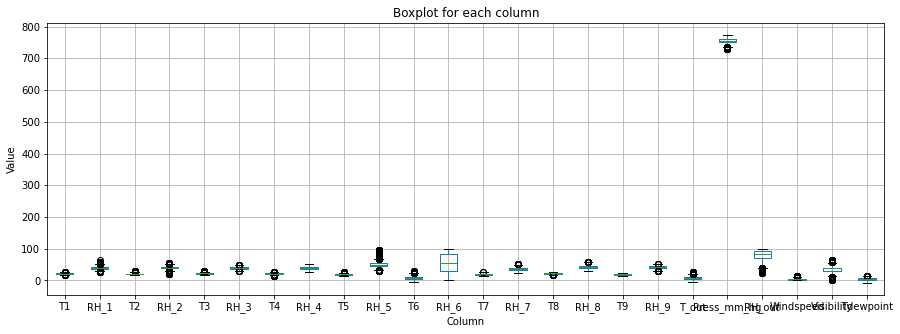

In [51]:
# Checking for outliers
# create a larger plot
fig, ax = plt.subplots(figsize=(15, 5))

# create a boxplot for each column
X.boxplot(ax=ax)

# set the title and axis labels
plt.title('Boxplot for each column')
plt.xlabel('Column')
plt.ylabel('Value')

# show the plot
plt.show()

<AxesSubplot:xlabel='Usage', ylabel='Count'>

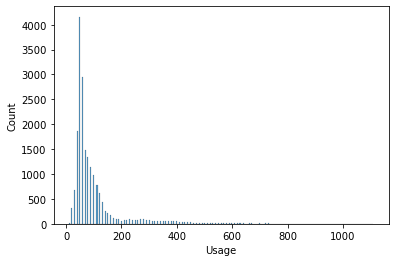

In [52]:
# Check the distribution of the target variable
sns.histplot(y)

<AxesSubplot:>

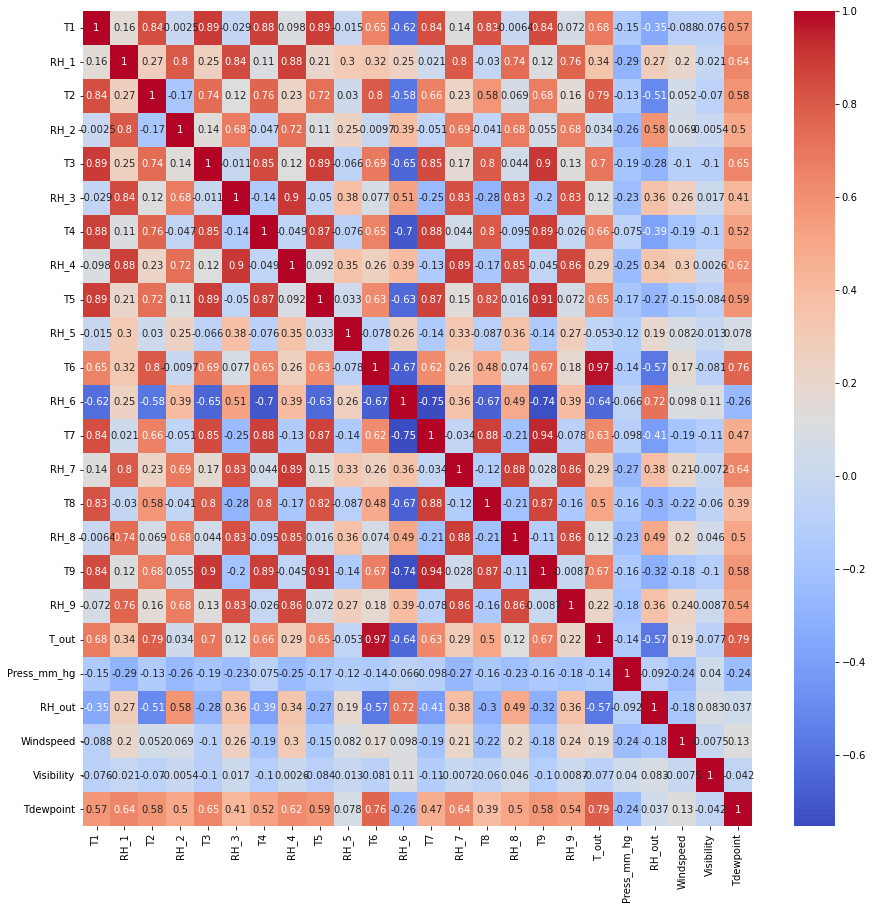

In [53]:
# Correlation Analysis
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Normalize data
normalized_X = scaler.fit_transform(X)

# Convert to DataFrame
df_normalized = pd.DataFrame(normalized_X, columns=X.columns)

# Calculate correlation matrix
corr_matrix = df_normalized.corr()

# Setting the size of the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)

In [ ]:
# Visualization 

#### PCA

In [3]:
# PCA Design
"""
Overview
- 1 Function to return the transformed X matrix
- 1 Function to return the transformed testing vector
- 1 Function to normalize the data

Fit function
1 - Normalize the data
2 - Transform X matrix into principle components
3 - Add column of 1
4 - Train the model on the transformed dataset

Predict function
1 - Normalize the data (using the mean and std from normalizing the training data)
2 - Transform the data (using components during training then add a column of 1)
3 - Predict

Required functions (X)
1 - Normalization 
- Take in raw data
- Normalize
- Return normalized data, mean, stddev

2 - PCA (X, Num_PC = 3, add_1 = True)
- Take in the normalized data
- Covariance matrix
- Eigen values
- Eigenvectors
- Check variance explained
- Decide how many components to use (probably needs to be hard coded)
- Transform the data
- Return the transformed X, PC1, PC2, .....

3 - AddX0(X)
"""

'\nOverview\n- 1 Function to return the transformed X matrix\n- 1 Function to return the transformed testing vector\n- 1 Function to normalize the data\n\nFit function\n1 - Normalize the data\n2 - Transform X matrix into principle components\n3 - Add column of 1\n4 - Train the model on the transformed dataset\n\nPredict function\n1 - Normalize the data (using the mean and std from normalizing the training data)\n2 - Transform the data (using components during training then add a column of 1)\n3 - Predict\n\nRequired functions (X)\n1 - Normalization \n- Take in raw data\n- Normalize\n- Return normalized data, mean, stddev\n\n2 - PCA (X, Num_PC = 3, add_1 = True)\n- Take in the normalized data\n- Covariance matrix\n- Eigen values\n- Eigenvectors\n- Check variance explained\n- Decide how many components to use (probably needs to be hard coded)\n- Transform the data\n- Return the transformed X, PC1, PC2, .....\n\n3 - AddX0(X)\n'

In [4]:
"""
Input: Data matrix X, where each row represents a sample and each column represents a feature.
Standardize the data matrix X by subtracting the mean of each column and dividing by the standard deviation of each column.
Calculate the covariance matrix C of the standardized data matrix X.
Calculate the eigenvectors and eigenvalues of the covariance matrix C.
Sort the eigenvalues in decreasing order and choose the k eigenvectors that correspond to the k largest eigenvalues.
Construct the projection matrix P by concatenating the k eigenvectors as columns.
Project the standardized data matrix X onto the projection matrix P to obtain the reduced dimensionality dataset Y = X P.
Output: The reduced dimensionality dataset Y, where each row represents a sample and each column represents a principal component.
"""

'\nInput: Data matrix X, where each row represents a sample and each column represents a feature.\nStandardize the data matrix X by subtracting the mean of each column and dividing by the standard deviation of each column.\nCalculate the covariance matrix C of the standardized data matrix X.\nCalculate the eigenvectors and eigenvalues of the covariance matrix C.\nSort the eigenvalues in decreasing order and choose the k eigenvectors that correspond to the k largest eigenvalues.\nConstruct the projection matrix P by concatenating the k eigenvectors as columns.\nProject the standardized data matrix X onto the projection matrix P to obtain the reduced dimensionality dataset Y = X P.\nOutput: The reduced dimensionality dataset Y, where each row represents a sample and each column represents a principal component.\n'

In [181]:
# Helper Functions

def addX0(X):
    """
    Adds a column of 1 to the input dataset X (2d numpy array)
    """
    ones_column = np.ones((X.shape[0], 1))
    return np.hstack((ones_column, X))

def normalized_X(X):
    """
    Returns the normalized array X, along with a mean and std dev vector
    """
    # Calculate the mean and standard deviation of the array
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)

    # Subtract the mean and divide by the standard deviation
    normalized_arr = (X - mean) / std_dev

    return normalized_arr, mean, std_dev

def cumsum(arr):
    result = []
    total = 0
    for i in arr:
        total += i
        result.append(total)
    return result

def PCA(X, required_variance_percent = 95):
    """
    Returns the transformed X matrix (2d numpy array)
    """
    X_original = X
    # Normalizing the data first
    X_mean = np.mean(X, axis = 0)
    X = X - X_mean
    #print(X.shape)

    #Calculating the covariance matrix
    cov_matrix = np.cov(X, rowvar =  False)
    #print(cov_matrix.shape)
    
    # calculate the eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sorting according to eigenvalues
    idx = np.argsort(eigenvalues) # returns the indices of the sorted eigenvalues
    idx = idx[::-1]
    eigenvectors = eigenvectors.T[idx]
    eigenvalues = eigenvalues[idx]
    #print(eigenvectors.shape)

    # Explained Variance
    total_variance = sum(eigenvalues)
    explained_variance = eigenvalues/total_variance * 100
    explained_variance = cumsum(explained_variance)

    # Deciding how many components to select
    num_components = 1
    for i in explained_variance:
        if i > required_variance_percent:
            break
        else:
            num_components = num_components + 1 

    # Selecting the number of components
    pc = eigenvectors[:num_components,:]
    #print(pc.shape)

    # Transforming the matrix 
    transformed_matrix = np.dot(X, pc.T)
    print(transformed_matrix.shape)

    return transformed_matrix, eigenvalues, eigenvectors, explained_variance

# Why doesn't it match scikit learn's pca answers
# Should I be transposing the eigenvectors




In [182]:
transformed_matrix, eigenvalues, eigenvectors, explained_variance = PCA(X,required_variance_percent= 95)

(19735, 6)


In [183]:
eigenvectors.T

array([[-2.79894465e-02,  5.58689771e-02, -2.78989644e-02,
        -1.17709866e-02, -1.95354871e-03, -3.19989998e-03,
        -1.12919206e-01,  2.21379228e-01, -1.67086655e-01,
         1.22952803e-01,  1.31040748e-01, -7.15491626e-02,
         2.84670539e-02,  1.38264357e-01, -7.22054680e-02,
        -4.74591656e-02, -1.71282004e-01, -2.08673057e-01,
         3.25110575e-01,  1.73457931e-01, -3.60312963e-01,
         2.72623147e-01,  1.60477877e-02, -6.53920646e-01],
       [ 3.15382791e-02,  2.44003319e-01, -1.01589410e-01,
         5.26918700e-02, -8.15567901e-02,  6.22642706e-02,
         2.58658223e-01,  2.78407666e-01,  3.27693868e-01,
        -2.16038123e-01,  2.87505102e-01, -6.90162384e-02,
         2.01957442e-01, -4.66669872e-01,  2.21545605e-01,
         3.99977431e-01,  3.48660245e-02, -1.02877350e-01,
        -8.31503261e-02,  2.86433121e-02,  9.36697469e-02,
         1.13053082e-01, -1.40701176e-02, -1.45019594e-01],
       [-3.78449253e-02,  8.00952147e-02, -3.96594053e

In [184]:
explained_variance

[68.19355598301854,
 77.1366100953018,
 84.9542610173974,
 90.81630069423295,
 94.61825205140693,
 97.41288075969864,
 98.07668203022577,
 98.52698594424359,
 98.96817791106416,
 99.19852653889913,
 99.39575218447344,
 99.54919055210222,
 99.69623548337728,
 99.77228119335888,
 99.82505530063776,
 99.86635250137249,
 99.9025096757249,
 99.92992919464952,
 99.95307469924991,
 99.96988646281521,
 99.9823486178619,
 99.99015240707638,
 99.99579067544447,
 100.00000000000004]

In [185]:
transformed_matrix[:5, :]

array([[ 35.68434112,   4.94206676, -26.80250987,   4.52381375,
         -3.74347146, -17.98246436],
       [ 35.37153814,   6.22261656, -23.20212186,   4.22106582,
         -3.70976796, -17.80373017],
       [ 34.39887999,   7.44130742, -19.61103967,   3.6412623 ,
         -3.62936614, -17.67780315],
       [ 34.47601595,   8.61538156, -15.93997089,   3.45668311,
         -3.64334091, -17.54902565],
       [ 35.65097732,   9.88616756, -12.25405587,   3.66852218,
         -3.90133009, -17.36125935]])

In [186]:
# Checking using scikit learn
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(X)
transformed_X = pca.transform(X)

In [187]:
transformed_X[:5, :]

array([[-35.68434112,   4.94206676, -26.80250987,   4.52381375,
         -3.74347147,  17.98246436],
       [-35.37153814,   6.22261656, -23.20212186,   4.22106582,
         -3.70976796,  17.80373017],
       [-34.39887999,   7.44130742, -19.61103967,   3.6412623 ,
         -3.62936614,  17.67780315],
       [-34.47601595,   8.61538156, -15.93997089,   3.45668311,
         -3.64334091,  17.54902565],
       [-35.65097732,   9.88616756, -12.25405587,   3.66852218,
         -3.90133009,  17.36125935]])